In [19]:
from watermark import watermark
%load_ext watermark
%watermark -v -n -m -p numpy,scipy,sklearn,pandas

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Mon Oct 01 2018 

CPython 3.5.6
IPython 6.5.0

numpy 1.15.2
scipy 1.1.0
sklearn 0.20.0
pandas 0.23.4

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-34-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [111]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

PROJ_ROOT = os.path.abspath(os.path.join(os.pardir))
print(PROJ_ROOT)

/home/utsav/PycharmProjects/kaggle-bio-response


In [109]:
data_fname = os.path.join(PROJ_ROOT, 'data', 'raw', 'train.csv')
dframe = pd.read_csv(data_fname)
dframe.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#dframe = dframe.loc[:, dframe.std() > .01]
dframe.describe()

,Activity,D2,D5,D8,D11,D16,D26,D27,D31,D52,...,D1219,D1281,D1309,D1333,D1338,D1341,D1390,D1434,D1445,D1447
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.592436,0.212112,0.455133,0.171688,0.278736,0.742171,0.520661,0.109775,0.706062,...,0.089310,0.103706,0.102106,0.070381,0.160757,0.119435,0.147161,0.126899,0.115169,0.106105
std,0.498278,0.105860,0.102592,0.162731,0.177193,0.116261,0.112946,0.499640,0.105946,0.421552,...,0.285228,0.304919,0.302828,0.255823,0.367356,0.324343,0.354313,0.332905,0.319269,0.308013
min,0.000000,0.282128,0.002630,0.000000,0.000000,0.000000,0.071600,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.517811,0.138118,0.378062,0.040900,0.214897,0.674692,0.000000,0.036700,0.222222,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.585989,0.190926,0.499942,0.127742,0.286008,0.759480,1.000000,0.085600,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.668395,0.261726,0.569962,0.236559,0.316348,0.823669,1.000000,0.151357,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.964381,1.000000,0.989870,1.000000,0.980615,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/home/utsav/.conda/envs/kaggle/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/utsav/.conda/envs/kaggle/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/utsav/.conda/envs/kaggle/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/utsav/.conda/envs/kaggle/lib/python3.5/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj,

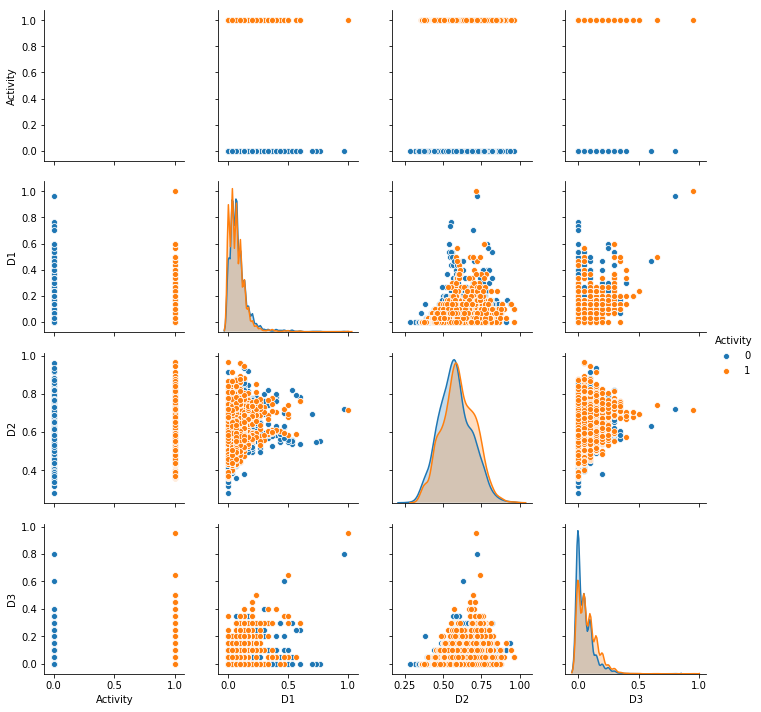

In [23]:
sns.pairplot(dframe, vars=['Activity', 'D1', 'D2', 'D3'], hue='Activity')

In [106]:
dframe.corr()['Activity']

Activity    1.000000
D1         -0.086402
D2          0.109226
D3          0.167209
D4         -0.044126
D5         -0.148447
D6         -0.106213
D7          0.137016
D8          0.172226
D9         -0.077743
D10         0.179096
D11        -0.113418
D12         0.032080
D13        -0.078850
D14         0.062848
D15        -0.051852
D16         0.106524
D17         0.050995
D18         0.123787
D19        -0.085130
D20        -0.141740
D21        -0.081993
D22        -0.017635
D23         0.051452
D25         0.049313
D26        -0.129470
D27         0.472340
D28        -0.021738
D29         0.015633
D30        -0.073914
              ...   
D1744       0.036589
D1746       0.058593
D1747       0.034278
D1748       0.027662
D1749       0.034375
D1750       0.022804
D1751       0.030202
D1752       0.020130
D1753       0.033684
D1754       0.025688
D1755       0.036375
D1756       0.041830
D1757       0.049396
D1758       0.045768
D1760       0.014148
D1761       0.038505
D1762       0

In [28]:
dframe.isnull().sum().sum()

0

In [90]:
dframe = preprocessing.StandardScaler().fit_transform(dframe)
pca=PCA(0.9)
pca.fit(dframe, 'Activity')
dframe = pd.DataFrame(pca.transform(dframe))
dframe.describe()

,0
count,8.000000
mean,0.000000
std,1.069045
min,-0.407101
25%,-0.381987
50%,-0.380790
75%,-0.366934
max,2.645281


In [103]:
dframe = dframe.loc[:, dframe.std() > .01]
dframe = dframe.loc[:, abs(dframe.corr()['Activity']) > .01]
dframe.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.018128,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.133434,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/home/utsav/.conda/envs/kaggle/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


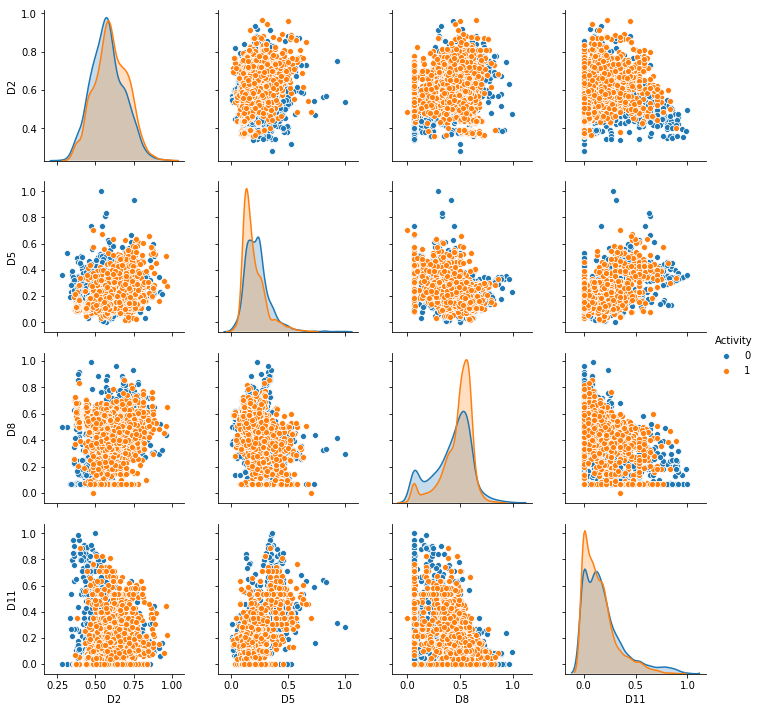

In [42]:
sns.pairplot(dframe, vars=['D2', 'D5', 'D8', 'D11'], hue='Activity')

In [52]:
list(dframe)

['Activity',
 'D1',
 'D2',
 'D3',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D13',
 'D14',
 'D15',
 'D16',
 'D17',
 'D18',
 'D19',
 'D20',
 'D23',
 'D26',
 'D27',
 'D30',
 'D31',
 'D32',
 'D35',
 'D36',
 'D43',
 'D48',
 'D49',
 'D50',
 'D51',
 'D52',
 'D55',
 'D56',
 'D59',
 'D60',
 'D61',
 'D62',
 'D63',
 'D64',
 'D66',
 'D67',
 'D68',
 'D69',
 'D70',
 'D73',
 'D74',
 'D75',
 'D76',
 'D77',
 'D78',
 'D79',
 'D81',
 'D83',
 'D84',
 'D87',
 'D88',
 'D89',
 'D96',
 'D98',
 'D100',
 'D101',
 'D103',
 'D106',
 'D108',
 'D116',
 'D117',
 'D119',
 'D124',
 'D125',
 'D129',
 'D131',
 'D132',
 'D133',
 'D135',
 'D136',
 'D140',
 'D146',
 'D147',
 'D149',
 'D152',
 'D153',
 'D155',
 'D156',
 'D158',
 'D160',
 'D161',
 'D162',
 'D163',
 'D164',
 'D173',
 'D174',
 'D175',
 'D177',
 'D181',
 'D182',
 'D186',
 'D187',
 'D194',
 'D196',
 'D197',
 'D198',
 'D200',
 'D201',
 'D202',
 'D204',
 'D207',
 'D209',
 'D210',
 'D211',
 'D214',
 'D217',
 'D222',
 'D225',
 'D228',
 'D229',
 'D231',
 '

In [57]:
dframe.std() > .05

Activity     True
D1           True
D2           True
D3           True
D4           True
D5           True
D6           True
D7           True
D8           True
D9           True
D10          True
D11          True
D12          True
D13          True
D14          True
D15          True
D16          True
D17          True
D18          True
D19          True
D20          True
D21         False
D22          True
D23          True
D24          True
D25          True
D26          True
D27          True
D28          True
D29          True
            ...  
D1747        True
D1748        True
D1749        True
D1750        True
D1751        True
D1752        True
D1753        True
D1754        True
D1755        True
D1756        True
D1757        True
D1758        True
D1759        True
D1760        True
D1761        True
D1762        True
D1763        True
D1764        True
D1765        True
D1766        True
D1767        True
D1768        True
D1769        True
D1770        True
D1771     

In [112]:
dframe = dframe.copy()
dframe = dframe.loc[:, dframe.std() > .01]
dframe = dframe.loc[:, abs(dframe.corr()['Activity']) > .01]
label = get_label(dframe)
features = get_featues(dframe)
features = preprocessing.StandardScaler().fit_transform(features)
pca = PCA(0.95)
pca.fit(features)
features = pd.DataFrame(pca.transform(features))
dframe = features.insert(0,'Activity',label)
dframe.describe()

NameError: name 'get_label' is not defined